In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_train = pd.read_excel(r'C:\Users\Ayushi\Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df_test = pd.read_excel(r'C:\Users\Ayushi\Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
df_train.shape

(10683, 11)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
#Splitting Date_of_Journey to form 3 new columns, month,date,year
df_train['month']=df_train['Date_of_Journey'].str.split('/').str[0]
df_train['date']=df_train['Date_of_Journey'].str.split('/').str[1]
df_train['year']=df_train['Date_of_Journey'].str.split('/').str[2]

In [10]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,date,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [11]:
#Changing the datatype from str to int
df_train['month'] = df_train['month'].astype('int')
df_train['date'] = df_train['date'].astype('int')
#df_train['year'] = df_train['year'].astype('int')

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  month            10683 non-null  int32 
 12  date             10683 non-null  int32 
 13  year             10683 non-null  object
dtypes: int32(2), int64(1), object(11)
memory usage: 1.1+ MB


In [13]:
df_train.drop('Date_of_Journey',axis=1,inplace=True)#no need of Date_of_Journey now

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  month            10683 non-null  int32 
 11  date             10683 non-null  int32 
 12  year             10683 non-null  object
dtypes: int32(2), int64(1), object(10)
memory usage: 1001.7+ KB


In [15]:
#we just require the time and not the date and month 
df_train['Arrival_Time'] = df_train['Arrival_Time'].str.split(' ').str[0]

In [16]:
#Extracting hours and minutes
df_train['Arrival_hour'] = df_train['Arrival_Time'].str.split(':').str[0]
df_train['Arrival_min'] = df_train['Arrival_Time'].str.split(':').str[0]

In [17]:
#changing there datatype as int
df_train['Arrival_hour'] = df_train['Arrival_hour'].astype('int')
df_train['Arrival_min'] = df_train['Arrival_min'].astype('int')

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  month            10683 non-null  int32 
 11  date             10683 non-null  int32 
 12  year             10683 non-null  object
 13  Arrival_hour     10683 non-null  int32 
 14  Arrival_min      10683 non-null  int32 
dtypes: int32(4), int64(1), object(10)
memory usage: 1.1+ MB


In [19]:
#we can drop Arrival Time
df_train.drop('Arrival_Time',axis=1,inplace=True)

In [20]:
#Following the same procedure for Departure Time as we did in Arrival time
df_train['dep_hour'] = df_train['Dep_Time'].str.split(':').str[0]
df_train['dep_min'] = df_train['Dep_Time'].str.split(':').str[0]
df_train['dep_hour'] = df_train['dep_hour'].astype('int')
df_train['dep_min'] = df_train['dep_min'].astype('int')
df_train.drop('Dep_Time',axis=1,inplace=True)

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   month            10683 non-null  int32 
 9   date             10683 non-null  int32 
 10  year             10683 non-null  object
 11  Arrival_hour     10683 non-null  int32 
 12  Arrival_min      10683 non-null  int32 
 13  dep_hour         10683 non-null  int32 
 14  dep_min          10683 non-null  int32 
dtypes: int32(6), int64(1), object(8)
memory usage: 1001.7+ KB


In [22]:
#Duration is supposed to be the differnce between arrival time and departure time

duration  = list(df_train['Duration'])



for i in range(len(duration)):
  if len(duration[i].split()) != 2 :
    if 'h' in duration[i]:
      duration[i] = duration[i].strip()+" 0m"
    else :
      duration[i] = "0h "+duration[i]


Duration_hours = []
Duration_min = []
for i in range(len(duration)):
    Duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    Duration_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [23]:
df_train["Duration_hours"] = Duration_hours
df_train["Duration_mins"] = Duration_min

df_train.drop(['Duration'],axis=1,inplace=True)

In [24]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,month,date,year,Arrival_hour,Arrival_min,dep_hour,dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,1,1,22,22,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,13,13,5,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,4,4,9,9,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,23,23,18,18,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,21,21,16,16,4,45


**Handling Categorical Data**

In [25]:
df_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [26]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

**Nominal Variable**

In [27]:
#Coverting Total_Stops column to numerical column
df_train['Total_Stops']= df_train['Total_Stops'].map({'non-stop':0,'2 stops':1,'1 stop':2,'3 stops':3,'4 stops':4,np.nan:2})

In [28]:
df_train['Total_Stops']= df_train['Total_Stops'].astype('int')

In [29]:
#Since we have stops columns which is related to Route, we doesn't require Route columns
df_train.drop(['Route'],axis=1,inplace=True)

In [30]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,date,year,Arrival_hour,Arrival_min,dep_hour,dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,1,22,22,2,50
1,Air India,Kolkata,Banglore,1,No info,7662,1,5,2019,13,13,5,5,7,25
2,Jet Airways,Delhi,Cochin,1,No info,13882,9,6,2019,4,4,9,9,19,0
3,IndiGo,Kolkata,Banglore,2,No info,6218,12,5,2019,23,23,18,18,5,25
4,IndiGo,Banglore,New Delhi,2,No info,13302,1,3,2019,21,21,16,16,4,45


**Ordinal Variable**

In [31]:
#Arlines names handling 
df_train.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [32]:
#Source handling
df_train.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [33]:
df_train.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [34]:
#Destination Handling
df_train.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [35]:
df_train.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [36]:
#Additional_Info
df_train.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [37]:
df_train.drop('Additional_Info',axis=1,inplace=True)

In [38]:
Airline = df_train[['Airline']]

Airline= pd.get_dummies(Airline,drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [39]:
Destination = df_train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [40]:
Source = df_train['Source']

Source= pd.get_dummies(Source,drop_first=True)

Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [41]:
df_train = pd.concat([df_train,Destination,Source,Airline],axis=1)

In [42]:
df_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [43]:
df_train.head()

,Total_Stops,Price,month,date,year,Arrival_hour,Arrival_min,dep_hour,dep_min,Duration_hours,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,24,3,2019,1,1,22,22,2,...,0,1,0,0,0,0,0,0,0,0
1,1,7662,1,5,2019,13,13,5,5,7,...,0,0,0,0,0,0,0,0,0,0
2,1,13882,9,6,2019,4,4,9,9,19,...,0,0,1,0,0,0,0,0,0,0
3,2,6218,12,5,2019,23,23,18,18,5,...,0,1,0,0,0,0,0,0,0,0
4,2,13302,1,3,2019,21,21,16,16,4,...,0,1,0,0,0,0,0,0,0,0


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Total_Stops                                10683 non-null  int32 
 1   Price                                      10683 non-null  int64 
 2   month                                      10683 non-null  int32 
 3   date                                       10683 non-null  int32 
 4   year                                       10683 non-null  object
 5   Arrival_hour                               10683 non-null  int32 
 6   Arrival_min                                10683 non-null  int32 
 7   dep_hour                                   10683 non-null  int32 
 8   dep_min                                    10683 non-null  int32 
 9   Duration_hours                             10683 non-null  int64 
 10  Duration_mins                     

**Performing all the EDA for TEST_SET**

In [45]:
df_test['month']=df_test['Date_of_Journey'].str.split('/').str[0]
df_test['date']=df_test['Date_of_Journey'].str.split('/').str[1]
df_test['year']=df_test['Date_of_Journey'].str.split('/').str[2]
df_test['month'] = df_test['month'].astype('int')
df_test['date'] = df_test['date'].astype('int')
df_test['year'] = df_test['year'].astype('int')
df_test.drop('Date_of_Journey',axis=1,inplace=True)#no need of Date_of_Journey now

print('-------------------------------------------------------')
df_test.info()

df_test['Arrival_Time'] = df_test['Arrival_Time'].str.split(' ').str[0]
#Extracting hours and minutes
df_test['Arrival_hour'] = df_test['Arrival_Time'].str.split(':').str[0]
df_test['Arrival_min'] = df_test['Arrival_Time'].str.split(':').str[0]
#changing there datatype as int
df_test['Arrival_hour'] = df_test['Arrival_hour'].astype('int')
df_test['Arrival_min'] = df_test['Arrival_min'].astype('int')
#we can drop Arrival Time
df_test.drop('Arrival_Time',axis=1,inplace=True)

print('-------------------------------------------------------')
df_test.info()


#Following the same procedure for Departure Time
df_test['dep_hour'] = df_test['Dep_Time'].str.split(':').str[0]
df_test['dep_min'] = df_test['Dep_Time'].str.split(':').str[0]
df_test['dep_hour'] = df_test['dep_hour'].astype('int')
df_test['dep_min'] = df_test['dep_min'].astype('int')
df_test.drop('Dep_Time',axis=1,inplace=True)

print('-------------------------------------------------------')
df_test.info()


#Coverting Total_Stops column to numerical column
df_test['Total_Stops']= df_test['Total_Stops'].map({'non-stop':0,'2 stops':1,'1 stop':2,'3 stops':3,'4 stops':4,'nan':2})
#Since we have stops columns which is related to Route, we doesn't require Route columns
df_test.drop(['Route'],axis=1,inplace=True)

print('-------------------------------------------------------')
df_test.info()


#Duration is supposed to be the differnce between arrival time and departure time

duration  = list(df_test['Duration'])

Duration_hours=[]
Duration_min=[]

for i in range(len(duration)):
  if len(duration[i].split()) != 2 :
    if 'h' in duration[i]:
      duration[i] = duration[i].strip()+" 0m"
    else :
      duration[i] = "0h "+duration[i]


for i in range(len(duration)):
  Duration_hours.append(int(duration[i].split(sep='h')[0]))
  Duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))

df_test["Duration_hours"] = Duration_hours
df_test["Duration_mins"] = Duration_min

df_test.drop(['Duration'],axis=1,inplace=True)

print('-------------------------------------------------------')
df_test.info()


Airline = df_test[['Airline']]

Airline= pd.get_dummies(Airline,drop_first=True)

Airline.head()

Destination = df_test[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

Source = df_test['Source']

Source= pd.get_dummies(Source,drop_first=True)

Source.head()

df_test = pd.concat([df_test,Destination,Source,Airline],axis=1)

df_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print('-------------------------------------------------------')
df_test.info()


-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Route            2671 non-null   object
 4   Dep_Time         2671 non-null   object
 5   Arrival_Time     2671 non-null   object
 6   Duration         2671 non-null   object
 7   Total_Stops      2671 non-null   object
 8   Additional_Info  2671 non-null   object
 9   month            2671 non-null   int32 
 10  date             2671 non-null   int32 
 11  year             2671 non-null   int32 
dtypes: int32(3), object(9)
memory usage: 219.2+ KB
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 13 co

In [46]:
df_test.head()

,Total_Stops,Additional_Info,month,date,year,Arrival_hour,Arrival_min,dep_hour,dep_min,Duration_hours,...,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,2,No info,6,6,2019,4,4,17,17,10,...,0,0,0,1,0,0,0,0,0,0
1,2,No info,12,5,2019,10,10,6,6,4,...,0,0,1,0,0,0,0,0,0,0
2,2,In-flight meal not included,21,5,2019,19,19,19,19,23,...,0,0,0,1,0,0,0,0,0,0
3,2,No info,21,5,2019,21,21,8,8,13,...,0,0,0,0,0,1,0,0,0,0
4,0,No info,24,6,2019,2,2,23,23,2,...,0,0,0,0,0,0,0,0,0,0


**FEATURE SCALING**

In [47]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
sc.fit_transform(df_train)

array([[-1.3284777 , -1.12554821,  1.23738294, ..., -0.00967551,
        -0.21666189, -0.01676004],
       [-0.22925012, -0.30904789, -1.47523929, ..., -0.00967551,
        -0.21666189, -0.01676004],
       [-0.22925012,  1.03985835, -0.53171851, ..., -0.00967551,
        -0.21666189, -0.01676004],
       ...,
       [-1.3284777 , -0.40295085,  1.59120323, ..., -0.00967551,
        -0.21666189, -0.01676004],
       [-1.3284777 ,  0.77224576, -1.47523929, ..., -0.00967551,
         4.61548632, -0.01676004],
       [-0.22925012,  0.57815073, -0.53171851, ..., -0.00967551,
        -0.21666189, -0.01676004]])

**Feature Selection**

Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

**heatmap**
**feature_importance_**
**SelectKBest**

In [48]:
x = df_train.drop(['Price'],axis=1)
y = df_train['Price']

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.20,random_state=100)

In [50]:
x_train.head()

,Total_Stops,month,date,year,Arrival_hour,Arrival_min,dep_hour,dep_min,Duration_hours,Duration_mins,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
2647,1,18,5,2019,20,20,8,8,12,5,...,0,0,0,0,0,0,0,0,0,0
3042,0,21,3,2019,22,22,19,19,2,40,...,0,0,1,0,0,0,0,0,0,0
1077,0,18,3,2019,12,12,9,9,2,35,...,0,0,0,0,0,0,1,0,0,0
4023,1,1,6,2019,12,12,5,5,7,5,...,0,0,1,0,0,0,0,0,0,0
8862,1,3,3,2019,19,19,21,21,21,45,...,0,0,0,0,0,0,0,0,0,0


In [51]:
x_train.columns

Index(['Total_Stops', 'month', 'date', 'year', 'Arrival_hour', 'Arrival_min',
       'dep_hour', 'dep_min', 'Duration_hours', 'Duration_mins',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [52]:
x_test.head()

,Total_Stops,month,date,year,Arrival_hour,Arrival_min,dep_hour,dep_min,Duration_hours,Duration_mins,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
7046,2,6,3,2019,15,15,8,8,7,15,...,0,0,1,0,0,0,0,0,0,0
7401,2,6,3,2019,9,9,14,14,18,45,...,0,0,0,0,0,0,0,0,1,0
6180,1,18,5,2019,18,18,8,8,10,10,...,0,0,0,0,0,0,0,0,0,0
5798,2,15,6,2019,19,19,13,13,6,0,...,0,0,1,0,0,0,0,0,0,0
7180,2,6,6,2019,4,4,19,19,8,40,...,0,0,1,0,0,0,0,0,0,0


In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [54]:
rf.score(x_test,y_test)

0.7110282401132981

In [55]:
rf.score(x_train,y_train)

0.9648785653488687

In [56]:
y_predict = rf.predict(x_test)

In [57]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 1424.4972364474863
MSE: 6286904.249635079
RMSE: 2507.3699865865588


In [58]:
metrics.r2_score(y_test, y_predict)

0.7110282401132981

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
parm_grid = { 
            #"criterion":["gini", "entropy"],
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
             "min_samples_leaf" : [1,2,3,4,5,6,7,8,9,10],
             "max_depth" : [2,4,6,7,8]
            }

In [61]:
rscv = RandomizedSearchCV(cv=5,param_distributions=parm_grid,estimator=rf)

In [62]:
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 4, 8],
                                        'n_estimators': [10, 20, 30]})

In [63]:
rscv.best_params_

{'n_estimators': 20,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': True}

In [64]:
rscv.score(x_test,y_test)

0.703428415502009

In [65]:
rscv.score(x_train,y_train)

0.8373409929245839

In [66]:
from sklearn import metrics
prediction = rscv.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1544.4678160459862
MSE: 6452246.944934885
RMSE: 2540.1273481727026


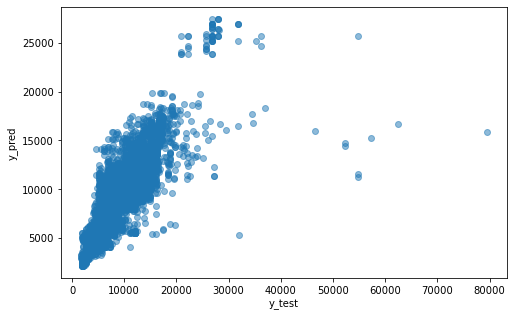

In [67]:
plt.figure(figsize = (8,5))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

C:\Users\Ayushi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


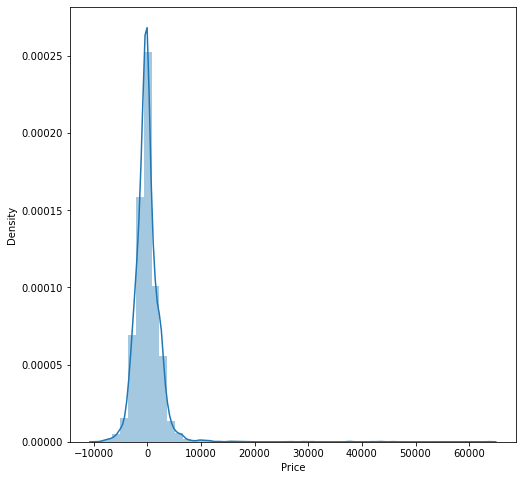

In [68]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [69]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rff.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)

In [77]:
model = open('flight_rff.pkl','rb')
forest = pickle.load(model)

In [ ]:
#y_prediction = forest.predict(x_test)

In [ ]:
#metrics.r2_score(y_test, y_prediction)